# Users and Mentions word clouds - General Covid-19 dataset 

We've used the following packages:

In [ ]:
import pandas as pd
import numpy as np
import json
import itertools
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import altair as alt
from matplotlib.colors import ListedColormap

alt.data_transformers.disable_max_rows()

To read the JSON file that has all the tweets, it is necessary to do:

In [ ]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

## Users

We have filtered all the users:

In [ ]:
index_users=0
cmt_list_users = []
for element in data:
    token_users=data[index_users]['user']['screen_name']
    cmt_list_users.append(token_users)
    index_users=index_users+1

We have calculated the frequency distribution, displayed in the form of a bar chart showing the 10 most frequent usernames within the dataset:

In [ ]:
freq_dist = nltk.FreqDist(cmt_list_users)

#freq_dist.plot(15,cumulative=False)
#plt.show()

fdist_users = dict(freq_dist)
#fdist_sorted = dict(sorted(fdist_users.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
#out = dict(itertools.islice(fdist_sorted.items(), 15))

df_users = pd.DataFrame.from_dict(fdist_users, orient='index').reset_index()
df_users = df_users.rename(columns={'index':'Usernames', 0:'Count'})
#print(df_users)
#alt.renderers.enable('altair_viewer',inline=True)

#Assigns a rank order value to each data object in a window, starting from 1. Peer values are assigned the same rank. 
#Subsequent rank scores incorporate the number of prior values. For example, if the first two values tie for rank 1, the third value is assigned rank 3.
chart = alt.Chart(
    df_users
).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Usernames:N',sort='-x'),
    color=alt.Color('Count:Q',scale=alt.Scale(scheme="reds")),
    tooltip=[
        alt.Tooltip('Usernames:N', title='Username'),
        alt.Tooltip('Count:Q', title='Tweet count')
    ]
).transform_window(
    rank='rank(Count)',
    sort=[alt.SortField('Count', order='descending')]
).transform_filter(
    (alt.datum.rank <= 10)
).properties(
    width=700,
    height=300,
    title = "The 10 most frequent usernames in the dataset"
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=20,
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
)

chart

The users word cloud is created:

In [ ]:
mask = np.array(Image.open('grafici/circle.jpg'))

a = ['#3C1067', '#075A23', '#44AA99', '#D55E00', '#AA4499', '#882255']
my_cmap = ListedColormap(a)

wordcloud = WordCloud(background_color ='white', 
                font_path = 'grafici/GothamMedium.ttf',
                mask=mask,
                width=mask.shape[1],
                height=mask.shape[0],
                min_word_length = 3,
                max_words=400,
                min_font_size = 14,
                colormap=my_cmap).generate_from_frequencies(fdist_users)

Plot the users word cloud:

In [ ]:
# Plot the word cloud image                      
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

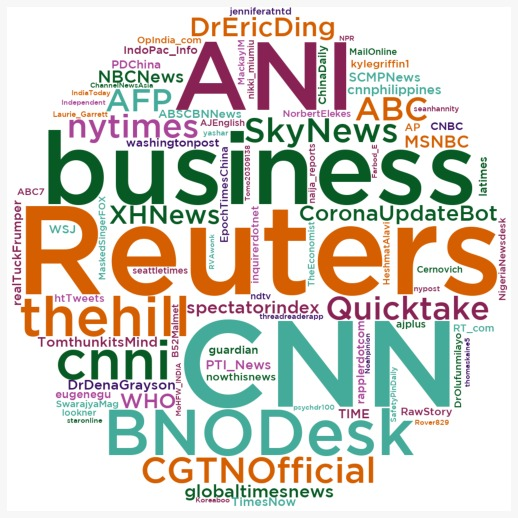

## Mentions

We have also filtered all the mentions:

In [ ]:
index_mentions=0
cmt_list_mentions = []
for element in data:
    for entity in data[index_mentions]['entities']['user_mentions']:
        token_mentions=entity['screen_name']
        cmt_list_mentions.append(token_mentions)
    index_mentions=index_mentions+1

We have calculated the frequency distribution, always displayed in the form of a bar chart showing the 10 most frequent mentioned usernames within the dataset:

In [ ]:
fdist_mentions = dict(nltk.FreqDist(cmt_list_mentions))
#fdist_sorted_mentions = dict(sorted(fdist_mentions.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
#out_mentions = dict(itertools.islice(fdist_sorted_mentions.items(), 15))

df_mentions = pd.DataFrame.from_dict(fdist_mentions, orient='index').reset_index()
df_mentions = df_mentions.rename(columns={'index':'Usernames', 0:'Count'})
#print(df)
#alt.renderers.enable('altair_viewer',inline=True)

#range=['#feedda','#ff9a2e','#fc8200','#cc6900','#9b5000','#6a3600','#391d00']

c = alt.Chart(
    df_mentions
).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Usernames:N',sort='-x'),
    color=alt.Color('Count:Q',scale=alt.Scale(scheme="blues")),
    tooltip=[
        alt.Tooltip('Usernames:N', title='Mentioned Username'),
        alt.Tooltip('Count:Q', title='Tweet count')
    ]
).transform_window(
    rank='rank(Count)',
    sort=[alt.SortField('Count', order='descending')]
).transform_filter(
    (alt.datum.rank <= 10)
).properties(
    width=700,
    height=300,
    title="The 10 most mentioned usernames in the dataset"
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=20,
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
)

c

The mentions word cloud is created:

In [ ]:
mask=np.array(Image.open('grafici/triangle.jpg'))

a = ['#021954', '#357910', '#C1377A', '#7A05A0', '#96142F']
my_cmap = ListedColormap(a)

wordcloud = WordCloud(mask=mask,
            width=mask.shape[1],
            height=mask.shape[0],
            background_color ='white', 
            min_word_length = 3,
            max_words=120,
            font_path = 'grafici/GothamMedium.ttf',
            min_font_size = 15,
            colormap=my_cmap).generate_from_frequencies(fdist_mentions) 

Plot the mentions word cloud:

In [ ]:
# Plot the word cloud image                 
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

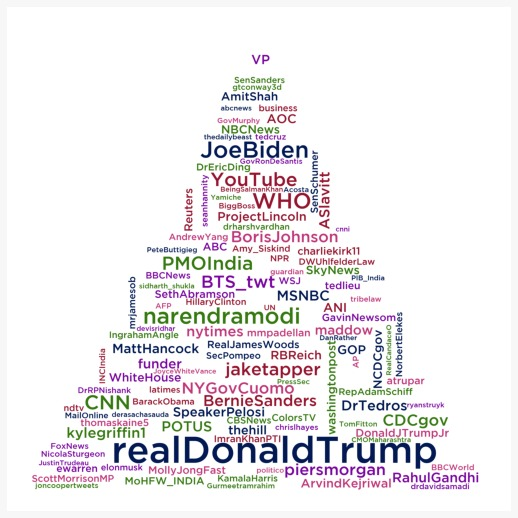